## Case study definition

Here is a 2-variable function:

$$ f: (x, y) \rightarrow  xy + (x-4)^2 + (y+3)^2 $$

Let's determine the minimum of this function.

## Code

### Simple example

The relevant function is `minimize` from package `scipy.optimize`.

In [1]:
from scipy.optimize import minimize
import numpy as np

It takes 2 mandatory arguments:

- function to minimize
- initial values for the minimisation

Here after, function `f` takes as input a `numpy` array of size 2.

In [2]:
def f(X):
    x, y = X
    return x*y + (x-4)**2 + (y+3)**2

initial = np.array([4, -3])

Then `minimize` is called:

In [3]:
result = minimize(f, initial)

It returns a `OptimizeResult` object:

In [4]:
print(type(result))
result

<class 'scipy.optimize._optimize.OptimizeResult'>


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -24.333333333333265
        x: [ 7.333e+00 -6.667e+00]
      nit: 5
      jac: [ 0.000e+00 -4.768e-07]
 hess_inv: [[ 6.667e-01 -3.333e-01]
            [-3.333e-01  6.667e-01]]
     nfev: 21
     njev: 7

Let's extract the _argmin_ values:

In [5]:
x_min, y_min = result.x
x_min, y_min

(7.333333584713669, -6.666666929228556)

### Additional arguments

It may happen that function `f` has more arguments than the one we want to minimize along, i.e. that some arguments are fixed. For instance, let's add the $m$ variable:

$$ f: (x, y, m) \rightarrow  \left(xy + (x-4)^2\right)^m + (y+3)^2 $$

When defining `f`, $m$ must not be given in `X` (that holds $x$ and $y$) but in a separate variable:

In [6]:
def f(X, m):
    x, y = X
    return (x*y + (x-4)**2)**m + (y+3)**2

Then an argument `args` is used in `minimize` to set $m$ value. Note that a `tuple` is required even if there is only one fixed variable:

In [7]:
minimize(f, initial, args=(1, )).x

array([ 7.33333358, -6.66666693])

In [8]:
minimize(f, initial, args=(2, )).x

array([ 1.72508278, -3.00000009])

### Specify the jacobian

Specifying the jacobian is a way to fasten/improve minimization. This is done by modifying `f`. `f` now returns:

- the function value itself (same than previously)
- the partial derivatives that define the jacobian

Let's compute these derivatives (without the $m$ case).

With respect to $x$:

$$ \frac{\partial f}{\partial x}: (x, y) \rightarrow  y + 2(x-4) $$

With respect to $y$:

$$ \frac{\partial f}{\partial y}: (x, y) \rightarrow  x + 2(y+3) $$


In [9]:
def f(X):
    x, y = X
    value = x*y + (x-4)**2 + (y+3)**2
    jac = np.array([y + 2 *(x-4), x+ 2 *(y+3)])
    return value, jac

x_min, y_min = minimize(f, initial, jac=True).x
x_min, y_min

(7.333333333333333, -6.666666666666667)

Note that the order in `jac` is the same as in `X` ($x$ first, then $y$).

## Plot the result

In [10]:
import matplotlib.pyplot as plt

### Data definition

In [11]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)
zz, _ = f([xx, yy])   # gradient is not needed here

### Plotting

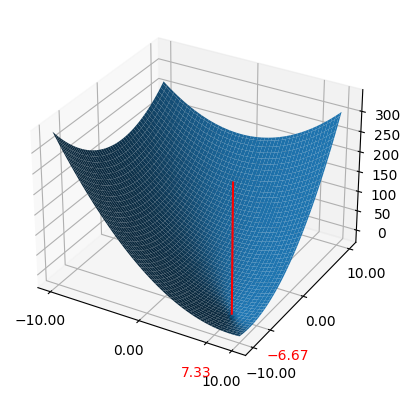

In [12]:
# surface only
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(xx, yy, zz)


# red tick label for x_min and y_min
x_ticks = [-10, 0, 10] + [x_min]
ax.set_xticks(x_ticks)
x_ticklabels = ax.get_xticklabels()
for tick, label in zip(x_ticks, x_ticklabels):
    if tick == x_min:
        label.set_color('red')
        
y_ticks = [-10, 0, 10] + [y_min]
ax.set_yticks(y_ticks)
y_ticklabels = ax.get_yticklabels()
for tick, label in zip(y_ticks, y_ticklabels):
    if tick == y_min:
        label.set_color('red')
        
# vertical line at solution point
z, _ = f([x_min, y_min])
marker, line, _ = ax.stem([x_min], [y_min], [z], bottom=300)
line.set_color('red')

